# Predicting purchases using scikit-learn

For this project, the aim is to predict purchases using the target field TargetBuy (Organics Purchase Indicator). 

This python notebook covers:

Preparing the environment
* Setting up the python environment, loading necessary libraries
* Loading the dataset

Analysing the Data
* Defining a custom function for plotting bars with custom formatting to be used in data exploration
* <ins>Exploring the data</ins>: checking for missing values, statistics and distribution of the target variable
* <ins>Cleaning and preparing the data</ins>: dropping columns, dealing with missing data, replace values, create dummy variables
* Splitting training and test data, inpute missing data where relevant

Predicting the Data
* <ins>Modelling with various sklearn (scikit-learn) models</ins>: 
```
    1. Logistic Regression
    2. SGD (Stocastic Gradient Descent/ Linear SVM) Classifier
    3. Decision Tree Classifier
    4. KNeighborsClassifier
    5. SVC (Support Vector Classfier)
    6. Linear SVC
    7. Gaussian NB (Naive Bayes)
    8. Random Forest Classifier
    9. Gradient Boosting Classifier
    10. MLP (Multi-layer Perceptron) Classifier
```
* Model Evaluation with f1 score

### 1. Setting up the environment

In [1]:
# Load necessary libraries for data exploration
import time
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set seed for replicability.
seedno = 18704
np.random.seed(seedno)

# Set nb run start time to compute total runtime
nbstarttime= time.time()

# Define float display to 4 decimal places
pd.options.display.float_format = '{:,.4f}'.format

### 2. Define custom function

In [2]:
#define plotting function to allow for custom colour scheme and formatting using seaborn
def plot_bars(attribute,setpalette='Spectral',setrotation=0,showlabels=True,sortvalue='ascending',sortcount=None,typeas=str):
    sns.set(style="whitegrid")
# Store frequency counts of each label where unique is the label and counts is its frequency
    unique, counts = np.unique(attribute.astype(typeas), return_counts=True)
    unique_counts = pd.DataFrame({'Value': unique, 'Count': counts})
    if sortvalue == 'descending':
        unique_counts = unique_counts.sort_values('Value', ascending=False)
    if sortvalue == 'ascending':
        unique_counts = unique_counts.sort_values('Value', ascending=True)
    if sortcount == 'descending':
        unique_counts = unique_counts.sort_values('Count', ascending=False)
    if sortcount == 'ascending':
        unique_counts = unique_counts.sort_values('Count', ascending=True)

# plot frequency counts
    fig, ax = plt.subplots(figsize=(15,5))
    ax = sns.barplot(x="Value", y="Count", data=unique_counts,palette=setpalette)
    if showlabels==True:
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 
    plt.setp(ax.get_xticklabels(), rotation=setrotation)
    plt.show()

### 3. Loading the Dataset

We first load the dataset into a pandas dataframe. We also create and work on a copy of the dataframe so we do not amend and can retrieve the source values if we so require.

In [3]:
organics = pd.read_csv('organics.csv')

In [4]:
organics_source = organics.copy

### 4. Exploring Data

#### Rows and Columns

In order to understand the data, we look at its shape and columns. There are 22223 records and 15 attributes.

In [5]:
display(organics.shape)
display(organics.head(5))

(22223, 15)

,Customer Loyalty ID,Gender,Geographic Region,Loyalty Status,Neigborhood Cluster-55 Level,Neighborhood Cluster-7 Level,Television Region,Affluence Grade,Age,Frequency,Frequency Percent,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend
0,140,U,Midlands,Gold,16.0000,C,Wales & West,10,76,1,0.00%,4,0,0,"16,000.0000"
1,620,U,Midlands,Gold,35.0000,D,Wales & West,4,49,1,0.00%,5,0,0,"6,000.0000"
2,868,F,Midlands,Silver,27.0000,D,Wales & West,5,70,1,0.00%,8,1,1,0.0200
3,1120,M,Midlands,Tin,51.0000,F,Midlands,10,65,1,0.00%,7,1,1,0.0100
4,2313,F,Midlands,Tin,4.0000,A,Midlands,11,68,1,0.00%,8,0,0,0.0100


#### Are there any missing data?

Using the isnull and dropna functions, we check for missing data. Unfortunately, there are 5 columns with missing values, namely, Gender, Geographic Region, Neighborbood Cluster-55 and 7, and Television Region. 

In [6]:
organics.isnull().sum()

Customer Loyalty ID                0
Gender                          2512
Geographic Region                465
Loyalty Status                     0
Neigborhood Cluster-55 Level     674
Neighborhood Cluster-7 Level     674
Television Region                465
Affluence Grade                    0
Age                                0
Frequency                          0
Frequency Percent                  0
Loyalty Card Tenure                0
Organics Purchase Count            0
Organics Purchase Indicator        0
Total Spend                        0
dtype: int64

In [7]:
organics.shape[0] - organics.dropna().shape[0]

3527

#### Basic statistical information on numerical fields####

By running the describe function, we can obtain basic statistical information on the the numerical and categorical fields.

In [8]:
organics.describe(include = [np.number]) #describe all numerical fields

,Customer Loyalty ID,Neigborhood Cluster-55 Level,Frequency,Organics Purchase Count,Organics Purchase Indicator,Total Spend
count,"22,223.0000","21,549.0000","22,223.0000","22,223.0000","22,223.0000","22,223.0000"
mean,"26,055,403.4399",27.1937,1.0000,0.2947,0.2477,"4,420.5900"
std,"15,074,974.0574",15.7515,0.0000,0.5628,0.4317,"7,559.0475"
min,140.0000,1.0000,1.0000,0.0000,0.0000,0.0100
25%,"11,694,023.0000",14.0000,1.0000,0.0000,0.0000,0.0100
50%,"28,748,786.0000",27.0000,1.0000,0.0000,0.0000,"2,000.0000"
75%,"37,454,019.5000",38.0000,1.0000,0.0000,0.0000,"6,000.0000"
max,"52,856,469.0000",55.0000,1.0000,3.0000,1.0000,"296,313.8500"


In [9]:
organics.describe(include = ['O']) #describe all categorical fields

,Gender,Geographic Region,Loyalty Status,Neighborhood Cluster-7 Level,Television Region,Affluence Grade,Age,Frequency Percent,Loyalty Card Tenure
count,19711,21758,22223,21549,21758,22223,22223,22223,22223
unique,3,5,4,7,13,34,63,1,40
top,F,South East,Silver,C,London,8,.,0.00%,5
freq,12149,8634,8572,4566,6189,2634,1508,22223,4314


Through the output from the describe function it is revealed that certain categorical attributes like Customer Loyalty ID and Neighborhood Cluster-55 Level had been wrongly detected as numerical type, and numerical attributes Affluence Grade, Age, Frequency Percent and Loyalty Card Tenure wrongly detected as categorical.

On top of the missing values identified above, it appears that there may be further missing values in the data. For example Age = '.' is not a valid number, and hence such records should also be considered as missing values for Age. Let's look at each attribute one by one.

#### Field by field analysis####

#### 1. Organics Purchase Indicator

We first take a look at our target attribute - Organics Purchase Indicator. We note that this is an unbalanced target variable, and we would have to deal with balancing the classes later.

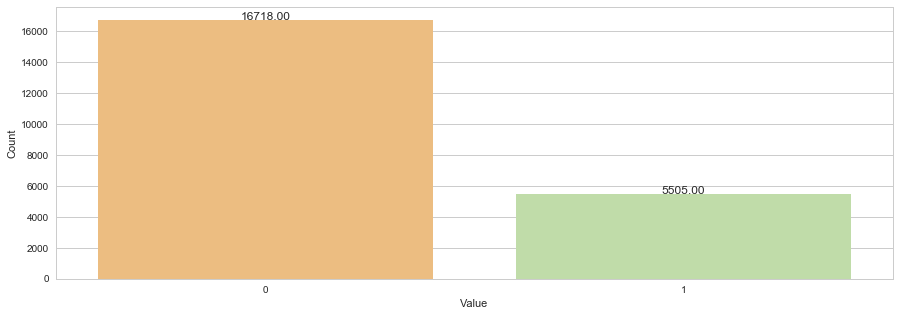

In [10]:
plot_bars(organics['Organics Purchase Indicator'])

#### 2. Organics Purchase Count

Then we look at Organics Purchase Count

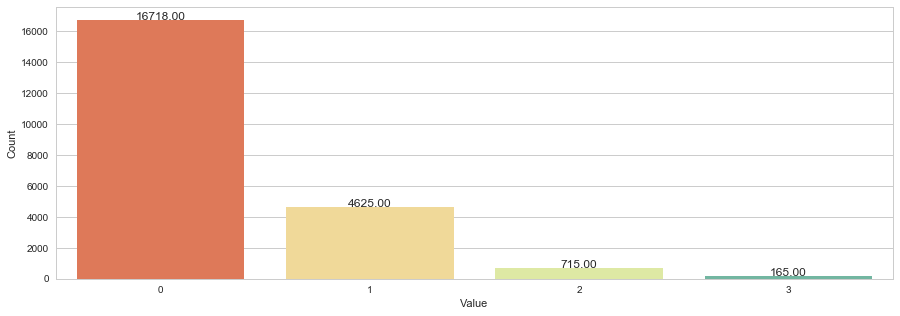

In [11]:
plot_bars(organics['Organics Purchase Count'])

We look at whether Organics Purchase Count Organics Purchase Indicator is correlated. If so, we have to drop the column

In [12]:
organics.astype(str).groupby(by=['Organics Purchase Count','Organics Purchase Indicator']).size()

Organics Purchase Count  Organics Purchase Indicator
0                        0                              16718
1                        1                               4625
2                        1                                715
3                        1                                165
dtype: int64

It appears that Organics Purchase Count is directly related to Organics Purchase Indicator, showing the purchase count where the indicator = 1. If included, we do not need any models to predict the Organics Purchase Indicator, because Organics Purchase Count > 0, Organics Purchase Indicator = 1. Consequently in the assignment, Organics Purchase Count role is set as rejected.

#### 3. Frequency

All items in the Frequency column is 1. There is no added information in this column and is to be dropped.

#### 4. Frequency Percent

All items in the Frequency Percent column is 0. There is no added information in this column and is to be dropped.

#### 5. Customer Loyalty ID

Customer Loyalty ID should be unique for each row. We use groupby to check if there are any duplicate rows.

In [13]:
len(organics) - len(organics.astype(str).groupby(by='Customer Loyalty ID').size())

0

There are no duplicates! But it is wrongly assessed to be numerical data - we convert it to categorical. Not that it matters since it will not be used in modeling. 

In [14]:
organics['Customer Loyalty ID'] = organics['Customer Loyalty ID'].astype('int64').astype(str)

#### 6. Total Spend

/Users/alphaniang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


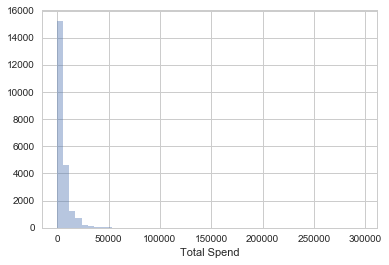

In [15]:
sns.distplot(organics['Total Spend'],kde=False)

#### 7. Loyalty Status

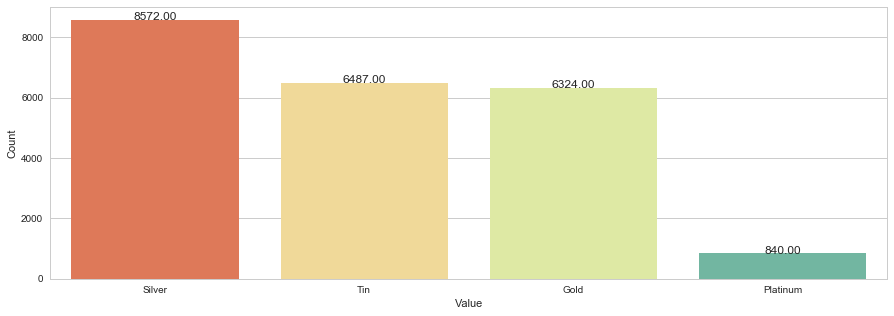

In [16]:
plot_bars(organics['Loyalty Status'],sortcount='descending')

#### 8. Loyalty Card Tenure

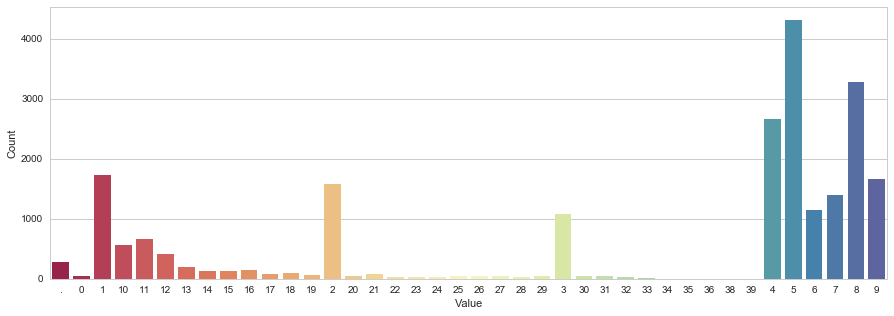

In [17]:
plot_bars(organics['Loyalty Card Tenure'],showlabels=False)

It appears that Loyalty Card Tenure is an int but stored as str, due to a value '.', resulting in funny sorting orders. We convert '.' to nan. As this is a numerical field, we impute using median.

In [18]:
organics['Loyalty Card Tenure Missing'] = 0
organics.loc[organics['Loyalty Card Tenure'] == '.', 'Loyalty Card Tenure Missing'] = 1
organics.loc[organics['Loyalty Card Tenure'] == '.', 'Loyalty Card Tenure'] = np.nan
organics['Loyalty Card Tenure'] = organics['Loyalty Card Tenure'].fillna(organics['Loyalty Card Tenure'].median())
organics['Loyalty Card Tenure'] = organics['Loyalty Card Tenure'].astype('int64')

#### 9. Age

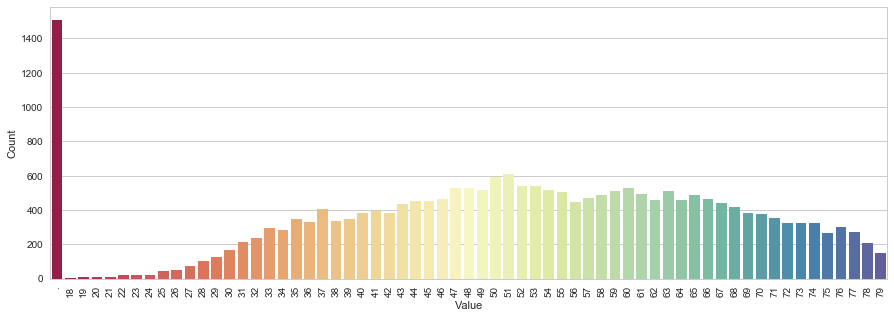

In [19]:
plot_bars(organics['Age'],showlabels=False,setrotation=90)

Convert age '.' as nan. is an int but stored as str, due to a value '.', resulting in funny sorting orders. We convert '.' to nan. As this is a numerical field, we impute using median.

In [20]:
organics['Age Missing'] = 0
organics.loc[organics['Age'] == '.', 'Age Missing'] = 1
organics.loc[organics['Age'] == '.', 'Age'] = np.nan
organics['Age'] = organics['Age'].fillna(organics['Age'].median())
organics['Age'] = organics['Age'].astype('int64')

#### 10. Affluence Grade

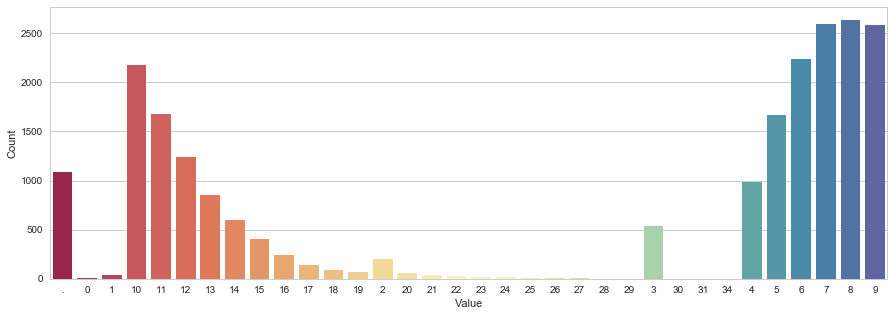

In [21]:
plot_bars(organics['Affluence Grade'],showlabels=False)

Convert age '.' as nan. is an int but stored as str, due to a value '.', resulting in funny sorting orders. We convert '.' to nan. As this is a numerical field, we will use interpolate later. We will deal with categorical missing values first.

In [22]:
organics['Affluence Grade Missing'] = 0
organics.loc[organics['Affluence Grade'] == '.', 'Affluence Grade Missing'] = 1
organics.loc[organics['Affluence Grade'] == '.', 'Affluence Grade'] = np.nan
organics['Affluence Grade'] = organics['Affluence Grade'].fillna(organics['Affluence Grade'].median())
organics['Affluence Grade'] = organics['Affluence Grade'].astype('int64')

#### 11. Gender

Based on the category counts, there are 'F', 'M' and 'U'. As well as 2512 records where Gender is unknown.

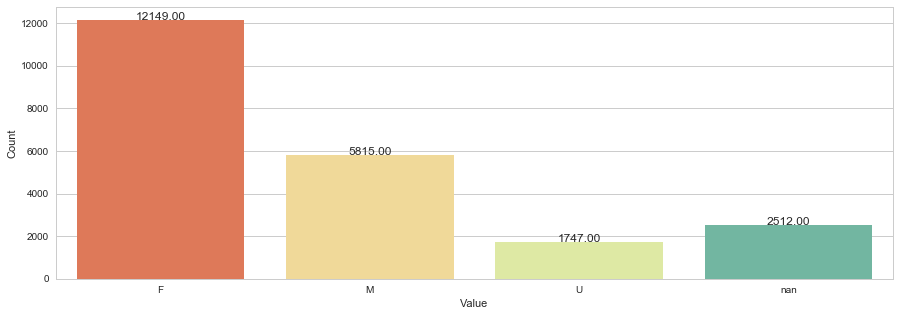

In [23]:
plot_bars(organics['Gender'])

In view that there can only be female and male gender, we presume that records with gender 'U' represent customers who do not wish to make their gender known. On the other hand records with gender null or nan are plainly missing. As such we will replace Gender where nan with 'Missing' to force a new category for nan.

In [24]:
organics.loc[organics['Gender'].isnull() , 'Gender'] = 'Missing'

#### 12. Neighborhood Cluster-55 Level

There is a typo in the column name for Neighborhood Cluster-55 Level. Lets correct it. 

Also, there are missing values for Neighborhood Cluster. We will force a new category for 'Missing' to identify the records with missing values. Also, highlighted above in when describing the data, the column is wrongly identified as numerical, we hence set it to categorical instead.

In [25]:
organics['Neighborhood Cluster-55 Level'] = organics['Neigborhood Cluster-55 Level']
organics = organics.drop('Neigborhood Cluster-55 Level', axis=1)

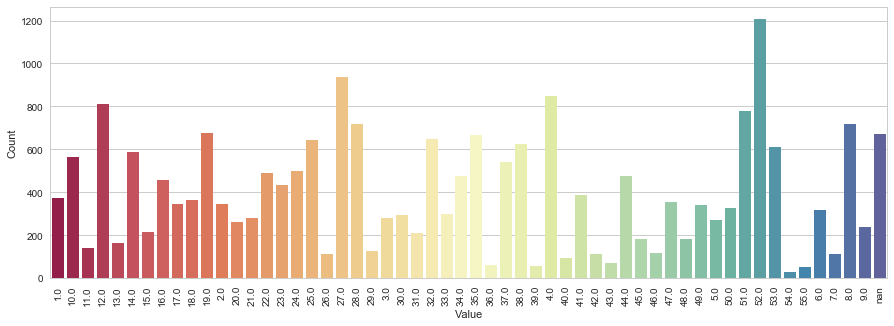

In [26]:
plot_bars(organics['Neighborhood Cluster-55 Level'],showlabels=False,setrotation=90)

In [27]:
organics.loc[pd.to_numeric(organics['Neighborhood Cluster-55 Level'], errors='coerce') == 0, 'Neighborhood Cluster-55 Level'] = np.nan
organics.loc[organics['Neighborhood Cluster-55 Level'].isnull() , 'Neighborhood Cluster-55 Level'] = 'Missing'

#### 13. Neighborhood Cluster-7 Level

There is another column Neighborhood Cluster-7 Level. Are they correlated? If so we will only retain one. Lets find out.

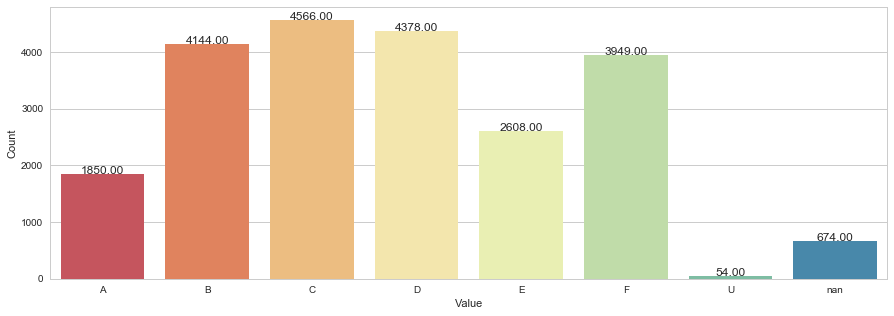

In [28]:
plot_bars(organics['Neighborhood Cluster-7 Level'])

In [29]:
organics.astype(str).groupby(by=['Neighborhood Cluster-7 Level','Neighborhood Cluster-55 Level']).size().unstack()

Neighborhood Cluster-55 Level,1.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,...,51.0,52.0,53.0,54.0,55.0,6.0,7.0,8.0,9.0,Missing
Neighborhood Cluster-7 Level,,,,,,,,,,,,,,,,,,,,,
A,375.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
B,nan,564.0000,139.0000,810.0000,166.0000,589.0000,216.0000,nan,nan,nan,...,nan,nan,nan,nan,nan,319.0000,113.0000,716.0000,241.0000,nan
C,nan,nan,nan,nan,nan,nan,nan,456.0000,347.0000,365.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
D,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
E,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
F,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,778.0000,"1,205.0000",613.0000,31.0000,nan,nan,nan,nan,nan,nan
U,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,54.0000,nan,nan,nan,nan,nan
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,674.0000


It appears that Neighborhood Cluster 55 Level are sub categories of Neighborhood Cluster 7 Level. Due to colinearity only one of these two columns are necessary. We will leave both in and let feature selection handle it. We also note that nan records in Neighborhood Cluster-55 Level, were also nan in Neighborhood Cluster-7 Level.

It appears that there are missing values for Neighborhood Cluster. We will force a new category for nan 'Z'

In [30]:
organics.loc[organics['Neighborhood Cluster-7 Level'].isnull() , 'Neighborhood Cluster-7 Level'] = 'Missing'

#### 14. Geographic Region

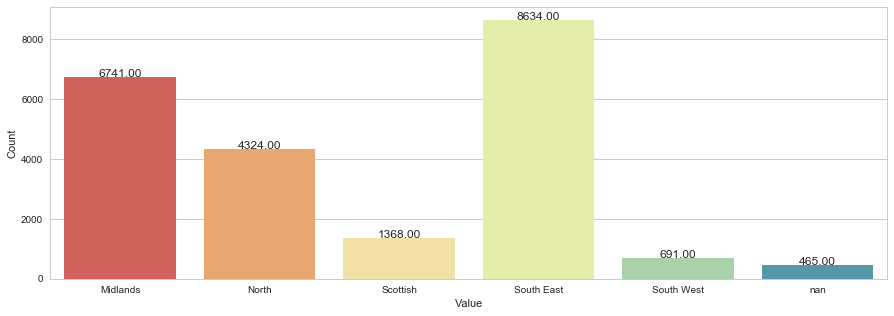

In [31]:
plot_bars(organics['Geographic Region'])

In [32]:
organics.loc[organics['Geographic Region'].isnull() , 'Geographic Region'] = 'Missing'

#### 15. Television Region

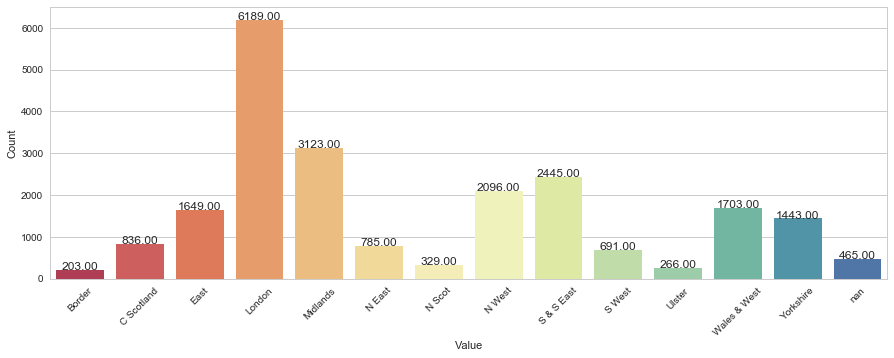

In [33]:
plot_bars(organics['Television Region'],setrotation=45)

In [34]:
organics.astype(str).groupby(by=['Geographic Region','Television Region']).size().unstack()

Television Region,Border,C Scotland,East,London,Midlands,N East,N Scot,N West,S & S East,S West,Ulster,Wales & West,Yorkshire,nan
Geographic Region,,,,,,,,,,,,,,
Midlands,nan,nan,"1,649.0000",nan,"3,123.0000",nan,nan,nan,nan,nan,266.0000,"1,703.0000",nan,nan
Missing,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,465.0000
North,nan,nan,nan,nan,nan,785.0000,nan,"2,096.0000",nan,nan,nan,nan,"1,443.0000",nan
Scottish,203.0000,836.0000,nan,nan,nan,nan,329.0000,nan,nan,nan,nan,nan,nan,nan
South East,nan,nan,nan,"6,189.0000",nan,nan,nan,nan,"2,445.0000",nan,nan,nan,nan,nan
South West,nan,nan,nan,nan,nan,nan,nan,nan,nan,691.0000,nan,nan,nan,nan


Similarly it appears that Television Region are sub categories of Geographic Region. Due to colinearity only one of these two columns are necessary. We will leave both in and let feature selection handle it. We also note that nan records in Television Region, were also nan in Geographic Region.

In [35]:
organics.loc[organics['Television Region'].isnull() , 'Television Region'] = 'Missing'

In [36]:
gender_dummies = pd.get_dummies(organics['Gender'])
gender_dummies = gender_dummies.add_prefix('Gender_')
organics = pd.concat([organics, gender_dummies],axis=1)

In [37]:
geog_dummies = pd.get_dummies(organics['Geographic Region'])
geog_dummies = geog_dummies.add_prefix('Geog_')
organics = pd.concat([organics, geog_dummies],axis=1)

In [38]:
loyaltyst_dummies = pd.get_dummies(organics['Loyalty Status'])
loyaltyst_dummies = loyaltyst_dummies.add_prefix('LoyaltySt_')
organics = pd.concat([organics, loyaltyst_dummies],axis=1)

In [39]:
tv_dummies = pd.get_dummies(organics['Television Region'])
tv_dummies = tv_dummies.add_prefix('Tv_')
organics = pd.concat([organics, tv_dummies],axis=1)

In [40]:
nb7_dummies = pd.get_dummies(organics['Neighborhood Cluster-7 Level'])
nb7_dummies = nb7_dummies.add_prefix('Nb7_')
organics = pd.concat([organics, nb7_dummies],axis=1)

In [41]:
nb55_dummies = pd.get_dummies(organics['Neighborhood Cluster-55 Level'])
nb55_dummies = nb55_dummies.add_prefix('Nb55_')
organics = pd.concat([organics, nb55_dummies],axis=1)

In [42]:
col_cats = ['Gender','Geographic Region', 'Television Region','Loyalty Status','Neighborhood Cluster-7 Level','Neighborhood Cluster-55 Level']
col_notreq = ['Customer Loyalty ID','Frequency','Frequency Percent','Organics Purchase Count']

In [43]:
organics_clean = organics.drop(col_cats,axis=1).drop(col_notreq,axis=1)

In [44]:
col_clean = organics_clean.columns.tolist()

In [45]:
# organics.head(20)

In [46]:
organics.isnull().any().sum()

0

In [47]:
organics.shape[0] - organics.dropna().shape[0]

0

### 4. Split train test set

We separate the features from the label. 

In [48]:
organics_X = organics_clean.drop('Organics Purchase Indicator', axis=1) # drop labels for training/ test X values
organics_y = organics_clean['Organics Purchase Indicator'].copy()

In [49]:
organics_X.shape

(22223, 99)

In [50]:
organics_y.shape

(22223,)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(organics_X, organics_y,train_size=0.80, test_size=0.20, random_state=seedno)

In [52]:
X_train.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

Now that we have split the training and test dataset, we will re-impute the missing numerical values with the median of the training set. 

We will also standardize the numerical values which are not in 0 to 1 range. For columns already in 0 (e.g. dummy variables), 1 form we will not further standardization. Standardization is only performed after splitting the dataset in order to avoid contamination of data between the training and test dataset. 

In [53]:
X_train_age_median = X_train.loc[X_train['Age Missing'] == 0, 'Age'].median()
X_train_loyalty_median = X_train.loc[X_train['Loyalty Card Tenure Missing'] == 0, 'Loyalty Card Tenure'].median()
X_train_affluence_median = X_train.loc[X_train['Affluence Grade Missing'] == 0, 'Affluence Grade'].median()

X_train.loc[X_train['Age Missing'] == 1, 'Age'] = X_train_age_median
X_train.loc[X_train['Loyalty Card Tenure Missing'] == 1, 'Loyalty Card Tenure'] = X_train_loyalty_median
X_train.loc[X_train['Affluence Grade Missing'] == 1, 'Affluence Grade'] = X_train_affluence_median

X_test.loc[X_test['Age Missing'] == 1, 'Age'] = X_train_age_median
X_test.loc[X_test['Loyalty Card Tenure Missing'] == 1, 'Loyalty Card Tenure'] = X_train_loyalty_median
X_test.loc[X_test['Affluence Grade Missing'] == 1, 'Affluence Grade'] = X_train_affluence_median

/Users/alphaniang/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [54]:
from sklearn.preprocessing import StandardScaler
numericals = ['Affluence Grade','Age','Loyalty Card Tenure','Total Spend']
numericals_scale = StandardScaler().fit(X_train[numericals])

X_train_scaled = numericals_scale.transform(X_train[numericals])
X_train = pd.concat([X_train.drop(numericals,axis=1), pd.DataFrame(X_train_scaled,columns=numericals)],axis=1)

X_test_scaled = numericals_scale.transform(X_test[numericals])
X_test = pd.concat([X_test.drop(numericals,axis=1), pd.DataFrame(X_test_scaled,columns=numericals)],axis=1)

### 5. Prediction

#### Review of Performance Different Models

After the tedious process of reviewing and preparing the data, its time to predict prices! For large datasets, we may not have computational resources to look at the performance of all models, but our dataset size is reasonable. We run 10 models to review the performance of each.

In [55]:
# Copy import statements of models from PolyMall and run them.
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import time

In [56]:
models = []
models.append(('LR', LogisticRegression(random_state=seedno,solver='lbfgs',max_iter=20000)))
models.append(('SGD', SGDClassifier(max_iter=1000, tol=1e-3, random_state=seedno)))
models.append(('DT', DecisionTreeClassifier(random_state=seedno)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
models.append(('SVC', SVC(random_state=seedno,gamma='auto',max_iter=20000)))
models.append(('LSVC', LinearSVC(random_state=seedno,max_iter=20000)))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(random_state=seedno,n_estimators=100)))
models.append(('GB', GradientBoostingClassifier(random_state=seedno)))
models.append(('MLP', MLPClassifier(random_state=seedno,max_iter=20000)))

In [57]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
import time

In [58]:
cat_names=[]
model_names = []
accuracy_scores=[]
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
index = 0

for model_name, model in models:
    scores = cross_validate(model,X_train,y_train, cv=10, scoring =('accuracy','precision','recall','f1','roc_auc'))

    accuracy_score = scores['test_accuracy'].mean()
    precision_score = scores['test_precision'].mean()
    recall_score = scores['test_recall'].mean()
    roc_auc_score = scores['test_roc_auc'].mean()
    f1_score = scores['test_f1'].mean()
    model_names.append(model_name)

    accuracy_scores.append(accuracy_score)
    precision_scores.append(precision_score)
    recall_scores.append(recall_score)
    f1_scores.append(f1_score)
    roc_auc_scores.append(roc_auc_score)
    cat_names.append('baseline')

# # too impatient to view results after X hours. display score and runtime per model/scaler after each run
#     models_fit = pd.DataFrame({"Model": model_names,"Accuracy":accuracy_scores,"Precision": precision_scores,"Recall": recall_scores,"f1":f1_scores,"AUC": roc_auc_scores})
#     display(models_fit.loc[[index],:])
#     index += 1

In [59]:
models_fit = pd.DataFrame({"Type":cat_names,"Model": model_names,"Accuracy":accuracy_scores,"Precision": precision_scores,"Recall": recall_scores,"f1": f1_scores,"AUC": roc_auc_scores}).sort_values(by='f1',ascending=False).reset_index(drop=True)
display(models_fit.loc[models_fit['Type']=='baseline',:])

,Type,Model,Accuracy,Precision,Recall,f1,AUC
0,baseline,GB,0.8151,0.6945,0.4444,0.5417,0.8263
1,baseline,LR,0.8097,0.6974,0.4007,0.5086,0.8028
2,baseline,RF,0.8040,0.6674,0.4058,0.5045,0.7941
3,baseline,LSVC,0.8081,0.7173,0.3639,0.4824,0.8021
4,baseline,DT,0.7342,0.4615,0.4742,0.4675,0.6468
5,baseline,MLP,0.7484,0.4904,0.4458,0.4659,0.7266
6,baseline,KNN,0.7626,0.5243,0.3895,0.4467,0.6927
7,baseline,SGD,0.8018,0.7327,0.3207,0.4361,0.7938
8,baseline,GNB,0.6800,0.3822,0.4886,0.4287,0.6633
9,baseline,SVC,0.8034,0.7759,0.2827,0.4142,0.8057


We try oversampling the minority class to see if we could improve the results

In [60]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=seedno)

for model_name, model in models:
    pipeline = Pipeline([('sm', sm), (model_name, model)])
    scores = cross_validate(pipeline,X_train,y_train, cv=10, scoring =('accuracy','precision','recall','f1','roc_auc'))

    accuracy_score = scores['test_accuracy'].mean()
    precision_score = scores['test_precision'].mean()
    recall_score = scores['test_recall'].mean()
    roc_auc_score = scores['test_roc_auc'].mean()
    f1_score = scores['test_f1'].mean()
    model_names.append(model_name)

    accuracy_scores.append(accuracy_score)
    precision_scores.append(precision_score)
    recall_scores.append(recall_score)
    f1_scores.append(f1_score)
    roc_auc_scores.append(roc_auc_score)
    cat_names.append('balanced')

# # too impatient to view results after X hours. display score and runtime per model/scaler after each run
#     models_fit = pd.DataFrame({"Model": model_names,"Accuracy":accuracy_scores,"Precision": precision_scores,"Recall": recall_scores,"f1":f1_scores,"AUC": roc_auc_scores})
#     display(models_fit.loc[[index],:])
#     index += 1

In [61]:
models_fit = pd.DataFrame({"Type":cat_names,"Model": model_names,"Accuracy":accuracy_scores,"Precision": precision_scores,"Recall": recall_scores,"f1": f1_scores,"AUC": roc_auc_scores}).sort_values(by='f1',ascending=False).reset_index(drop=True)
display(models_fit.loc[models_fit['Type']=='balanced',:])

,Type,Model,Accuracy,Precision,Recall,f1,AUC
0,balanced,GB,0.7986,0.5919,0.5844,0.5879,0.8223
1,balanced,SVC,0.7382,0.4783,0.7043,0.5696,0.8066
2,balanced,LR,0.7277,0.4651,0.7114,0.5624,0.8012
3,balanced,LSVC,0.7272,0.4645,0.7125,0.5623,0.8013
4,balanced,SGD,0.7222,0.4593,0.7104,0.5574,0.7985
6,balanced,RF,0.7955,0.6061,0.4829,0.5373,0.7942
10,balanced,KNN,0.6695,0.3908,0.6137,0.4775,0.6910
11,balanced,MLP,0.7348,0.4634,0.4840,0.4731,0.7164
14,balanced,DT,0.7276,0.4488,0.4643,0.4563,0.6389
16,balanced,GNB,0.6127,0.3422,0.6231,0.4416,0.6525


Lastly, we look at the effect of dimensionality reduction

In [62]:
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=seedno)
pca = PCA(random_state=seedno)

for model_name, model in models:
    pipeline = Pipeline([('sm', sm), ('pca',pca), (model_name, model)])
    scores = cross_validate(pipeline,X_train,y_train, cv=10, scoring =('accuracy','precision','recall','f1','roc_auc'))

    accuracy_score = scores['test_accuracy'].mean()
    precision_score = scores['test_precision'].mean()
    recall_score = scores['test_recall'].mean()
    roc_auc_score = scores['test_roc_auc'].mean()
    f1_score = scores['test_f1'].mean()
    model_names.append(model_name)

    accuracy_scores.append(accuracy_score)
    precision_scores.append(precision_score)
    recall_scores.append(recall_score)
    f1_scores.append(f1_score)
    roc_auc_scores.append(roc_auc_score)
    cat_names.append('pca_wbal')
        
# # too impatient to view results after X hours. display score and runtime per model/scaler after each run
#     models_fit = pd.DataFrame({"Model": model_names,"Accuracy":accuracy_scores,"Precision": precision_scores,"Recall": recall_scores,"f1":f1_scores,"AUC": roc_auc_scores})
#     display(models_fit.loc[[index],:])
#     index += 1

In [63]:
models_fit = pd.DataFrame({"Type":cat_names,"Model": model_names,"Accuracy":accuracy_scores,"Precision": precision_scores,"Recall": recall_scores,"f1": f1_scores,"Accuracy": roc_auc_scores}).sort_values(by='f1',ascending=False).reset_index(drop=True)
display(models_fit.loc[models_fit['Type']=='pca_wbal',:])

,Type,Model,Accuracy,Precision,Recall,f1
1,pca_wbal,GB,0.8051,0.5044,0.6651,0.5735
3,pca_wbal,SVC,0.8066,0.4783,0.7043,0.5696
6,pca_wbal,LSVC,0.8013,0.4645,0.7125,0.5623
7,pca_wbal,LR,0.8012,0.4650,0.7114,0.5623
9,pca_wbal,SGD,0.7962,0.4540,0.7066,0.5527
12,pca_wbal,RF,0.7752,0.5563,0.5055,0.5295
16,pca_wbal,KNN,0.6911,0.3909,0.6137,0.4775
21,pca_wbal,DT,0.6405,0.4141,0.5220,0.4617
22,pca_wbal,MLP,0.7109,0.4524,0.4700,0.4608
27,pca_wbal,GNB,0.6482,0.3265,0.6375,0.4316


In [64]:
display(models_fit[0:10])

,Type,Model,Accuracy,Precision,Recall,f1
0,balanced,GB,0.8223,0.5919,0.5844,0.5879
1,pca_wbal,GB,0.8051,0.5044,0.6651,0.5735
2,balanced,SVC,0.8066,0.4783,0.7043,0.5696
3,pca_wbal,SVC,0.8066,0.4783,0.7043,0.5696
4,balanced,LR,0.8012,0.4651,0.7114,0.5624
5,balanced,LSVC,0.8013,0.4645,0.7125,0.5623
6,pca_wbal,LSVC,0.8013,0.4645,0.7125,0.5623
7,pca_wbal,LR,0.8012,0.4650,0.7114,0.5623
8,balanced,SGD,0.7985,0.4593,0.7104,0.5574
9,pca_wbal,SGD,0.7962,0.4540,0.7066,0.5527


### 6. Selecting the Model

Based on the business case, we presume that the company wants to identify the group of customers that they could target for their marketing purposes. The objective is improve the f1 score (i.e. balanced precision and recall), such that the positive class who would purchase organic products are sent marketing materials but on the other hand not to incur unecessary costs of sending marketing materials to false positives.

We use grid search to make further refinements to the parameters to see if we can improve its performance

Two models, Gradient Boosting Classifier and Logistic Regression are shortlisted for grid search before final selection. These were selected over SVC and LSVC due to their shorter run time.

#### Logistic Regression

Lets see the baseline logistic regression model performance before grid search

In [65]:
lrgr=LogisticRegression(random_state=seedno,max_iter=10000,solver='lbfgs',class_weight='balanced')
pipeline = Pipeline([ ('pca',pca),('lrgr', lrgr)])
scoring_list = {'Accuracy': 'accuracy', 'Precision': 'precision', 'Recall': 'recall', 'f1': 'f1', 'AUC': 'roc_auc' }
scores = cross_validate(pipeline,X_train,y_train, cv=10, scoring =scoring_list,return_estimator=True)

In [66]:
display(scores['estimator'][0])

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=18704,
  svd_solver='auto', tol=0.0, whiten=False)), ('lrgr', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='warn', n_jobs=None, penalty='l2',
          random_state=18704, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False))])

In [67]:
scores['test_f1'].mean()

0.5607168402438247

In [68]:
from sklearn.model_selection import GridSearchCV

We perform grid search to find if we can tweak the model parameters to improve performance.

In [69]:
from sklearn.model_selection import GridSearchCV

lrgr_param_grid = [
    {'lrgr__class_weight': ['balanced'],'lrgr__max_iter':[10000],'lrgr__penalty': ['l1'], 'lrgr__solver': ['liblinear', 'saga'],'lrgr__multi_class': ['ovr'],'lrgr__class_weight': [None, 'balanced'],'lrgr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
  {'lrgr__class_weight': ['balanced'],'lrgr__max_iter':[10000],'lrgr__penalty': ['l2'], 'lrgr__solver': ['newton-cg','lbfgs','sag'],'lrgr__multi_class': ['ovr'],'lrgr__class_weight': [None, 'balanced'],'lrgr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
  ]

grid_search = GridSearchCV(pipeline, lrgr_param_grid, cv=10,
                           scoring=scoring_list, return_train_score=True, refit='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=18704,
  svd_solver='auto', tol=0.0, whiten=False)), ('lrgr', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='warn', n_jobs=None, penalty='l2',
          random_state=18704, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'lrgr__class_weight': [None, 'balanced'], 'lrgr__max_iter': [10000], 'lrgr__penalty': ['l1'], 'lrgr__solver': ['liblinear', 'saga'], 'lrgr__multi_class': ['ovr'], 'lrgr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, {'lrgr__class_weight': [None, 'balanced'], 'lrgr__max_iter': [10000], 'lrgr__penalty': ['l2'], 'lrgr__solver': ['newton-cg', 'lbfgs', 'sag'], 'lrgr__multi_class': ['ovr'], 'lrgr__C': [0.

The best hyperparameter combination found:

In [70]:
grid_search.best_params_

{'lrgr__C': 0.01,
 'lrgr__class_weight': 'balanced',
 'lrgr__max_iter': 10000,
 'lrgr__multi_class': 'ovr',
 'lrgr__penalty': 'l2',
 'lrgr__solver': 'newton-cg'}

In [71]:
display(grid_search.cv_results_['mean_test_Accuracy'][grid_search.best_index_])
display(grid_search.cv_results_['mean_test_Precision'][grid_search.best_index_])
display(grid_search.cv_results_['mean_test_Recall'][grid_search.best_index_])
display(grid_search.cv_results_['mean_test_f1'][grid_search.best_index_])
display(grid_search.cv_results_['mean_test_AUC'][grid_search.best_index_])

0.7273034087073912

0.4647041280635029

0.7127202261535945

0.562518822139418

0.8031561715705802

In [72]:
grid_search.best_score_

0.562518822139418

Lets see its performance on unseen data

In [73]:
lrgr=LogisticRegression(C=0.01,class_weight='balanced',max_iter=10000,multi_class='ovr',penalty='l2',solver='lbfgs',random_state=seedno)
sm = SMOTE(random_state=seedno)
pca = PCA(random_state=seedno)
X_train_bal, y_train_bal =sm.fit_resample(X_train,y_train)
    
pca.fit(X_train_bal)
lrgr.fit(pca.transform(X_train_bal),y_train_bal)
y_pred = lrgr.predict(pca.transform(X_test))

In [74]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(2438, 874, 314, 819)

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7327334083239595

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.80      3312
           1       0.48      0.72      0.58      1133

   micro avg       0.73      0.73      0.73      4445
   macro avg       0.68      0.73      0.69      4445
weighted avg       0.78      0.73      0.75      4445



In [77]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.5796178343949044

#### Gradient Boosting Classifier

Lets see the baseline gradient boosting classifier model performance before grid search

In [78]:
gbc=GradientBoostingClassifier(random_state=seedno)
sm = SMOTE(random_state=seedno)
pipeline = Pipeline([ ('sm',sm), ('pca',pca),('gbc', gbc)])
scoring_list = {'Accuracy': 'accuracy', 'Precision': 'precision', 'Recall': 'recall', 'f1': 'f1', 'AUC': 'roc_auc' }
scores = cross_validate(pipeline,X_train,y_train, cv=10, scoring =scoring_list,return_estimator=True)

In [79]:
display(scores['estimator'][0])

Pipeline(memory=None,
     steps=[('sm', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=18704, ratio=None,
   sampling_strategy='auto', svm_estimator='deprecated')), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=18704,
  svd_so...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))])

In [80]:
scores['test_f1'].mean()

0.5735352273196355

Lets see if we can improve model performance with grid search

In [81]:
from sklearn.model_selection import GridSearchCV

gbc_param_grid = [
    {"gbc__learning_rate": [0.05,0.1,0.2],
    "gbc__min_samples_split": [2,6,10],
    "gbc__min_samples_leaf": [1,3,5],
    "gbc__max_depth":[3,5,8],
    "gbc__max_features":[None],
    "gbc__criterion": ["friedman_mse"],
    "gbc__subsample":[0.5,0.8,1.0],
    "gbc__n_estimators":[50,100,150]
    }
  ]

grid_search = GridSearchCV(pipeline, gbc_param_grid, cv=2,
                           scoring=scoring_list, return_train_score=True, refit='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('sm', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=18704, ratio=None,
   sampling_strategy='auto', svm_estimator='deprecated')), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=18704,
  svd_so...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'gbc__learning_rate': [0.05, 0.1, 0.2], 'gbc__min_samples_split': [2, 6, 10], 'gbc__min_samples_leaf': [1, 3, 5], 'gbc__max_depth': [3, 5, 8], 'gbc__max_features': [None], 'gbc__criterion': ['friedman_mse'], 'gbc__subsample': [0.5, 0.8, 1.0], 'gbc__n_estimators': [50, 100, 150]}],
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring={'Accuracy': 'accuracy', 'Precision': 'precision', 'Recall': 'r

In [82]:
grid_search.best_params_

{'gbc__criterion': 'friedman_mse',
 'gbc__learning_rate': 0.05,
 'gbc__max_depth': 5,
 'gbc__max_features': None,
 'gbc__min_samples_leaf': 1,
 'gbc__min_samples_split': 10,
 'gbc__n_estimators': 50,
 'gbc__subsample': 0.5}

In [83]:
display(grid_search.cv_results_['mean_test_Accuracy'][grid_search.best_index_])
display(grid_search.cv_results_['mean_test_Precision'][grid_search.best_index_])
display(grid_search.cv_results_['mean_test_Recall'][grid_search.best_index_])
display(grid_search.cv_results_['mean_test_f1'][grid_search.best_index_])
display(grid_search.cv_results_['mean_test_AUC'][grid_search.best_index_])

0.7630779615254809

0.5146119789838739

0.6527904849039341

0.5754878603219945

0.8023223170682271

In [84]:
grid_search.best_score_

0.5754878603219945

Lets see its performance on unseen data

In [85]:
gbc=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.05,max_depth=5,max_features=None,min_samples_leaf=1,min_samples_split=10,n_estimators=50,subsample=0.5,random_state=seedno)
sm = SMOTE(random_state=seedno)
pca = PCA(random_state=seedno)
X_train_bal, y_train_bal =sm.fit_resample(X_train,y_train)
    
pca.fit(X_train_bal)
gbc.fit(pca.transform(X_train_bal),y_train_bal)
y_pred = gbc.predict(pca.transform(X_test))

In [86]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(2593, 719, 369, 764)

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.755230596175478

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      3312
           1       0.52      0.67      0.58      1133

   micro avg       0.76      0.76      0.76      4445
   macro avg       0.70      0.73      0.71      4445
weighted avg       0.78      0.76      0.76      4445



In [89]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.5840978593272173

The End!